<a href="https://colab.research.google.com/github/Danil1D/Machine-learning/blob/main/%D0%94%D0%B0%D1%88%D0%BA%D0%B5%D0%B2%D0%B8%D1%87_%D0%BB%D0%B0%D0%B1%E2%84%963(%D0%B7%D0%B0%D0%B2%D0%B4_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target


In [ ]:
#1. Вивести перші 5 рядків
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [ ]:
#2. Перевірка на пропуски
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [ ]:
#3. Перевірка на дублікатів
print(df.drop_duplicates(inplace=True))

None


In [ ]:
#4. Перевірка унікальних значень у стовпчику «стать» (gender)
print(df['sex'].unique())

[ 0.05068012 -0.04464164]


In [ ]:
#5. Перевірка та перетворення типів даних, якщо необхідно
df = df.apply(pd.to_numeric, errors='coerce')

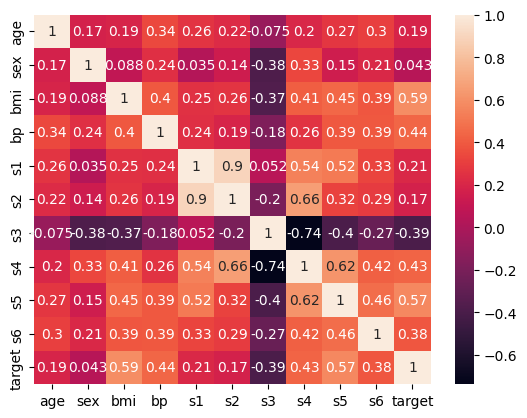

In [ ]:
#6. Кореляція і теплова карта
import seaborn as sns
import matplotlib.pyplot as plt
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
#7. Масштабування ознак
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

In [ ]:
#8 Поділ на тренувальну і тестову вибірки
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Linear Regression R2: {r2_score(y_test, y_pred_lr)}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RandomForest R2: {r2_score(y_test, y_pred_rf)}")
print(f"RandomForest MSE: {mean_squared_error(y_test, y_pred_rf)}")


Linear Regression R2: 0.4526027629719196
Linear Regression MSE: 2900.1936284934804
RandomForest R2: 0.44074575666493343
RandomForest MSE: 2963.013847191012


In [ ]:
#9. Визначення кореляції з цільовою змінною
correlation_with_target = df.corr()['target'].sort_values(ascending=False)

top_features = correlation_with_target.index[1:6]
print("Топ-5 ознак, що найбільше корелюють з цільовою змінною:", top_features)

X_top_features = df[top_features]
y = df['target']

X_scaled_top_features = scaler.fit_transform(X_top_features)

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_scaled_top_features, y, test_size=0.2, random_state=42)

lr_model_top = LinearRegression()
lr_model_top.fit(X_train_top, y_train_top)
y_pred_lr_top = lr_model_top.predict(X_test_top)

rf_model_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_top.fit(X_train_top, y_train_top)
y_pred_rf_top = rf_model_top.predict(X_test_top)


Топ-5 ознак, що найбільше корелюють з цільовою змінною: Index(['bmi', 's5', 'bp', 's4', 's6'], dtype='object')


In [ ]:
#10. Оцінка моделей
from sklearn.metrics import mean_squared_error, r2_score

print("Лінійна регресія:")
print(f"R²: {r2_score(y_test_top, y_pred_lr_top)}")
print(f"MSE: {mean_squared_error(y_test_top, y_pred_lr_top)}")

print("\nRandomForest регресія:")
print(f"R²: {r2_score(y_test_top, y_pred_rf_top)}")
print(f"MSE: {mean_squared_error(y_test_top, y_pred_rf_top)}")


Лінійна регресія:
R²: 0.4526878768819975
MSE: 2899.7426820819783

RandomForest регресія:
R²: 0.4174542196138553
MSE: 3086.4159449438207


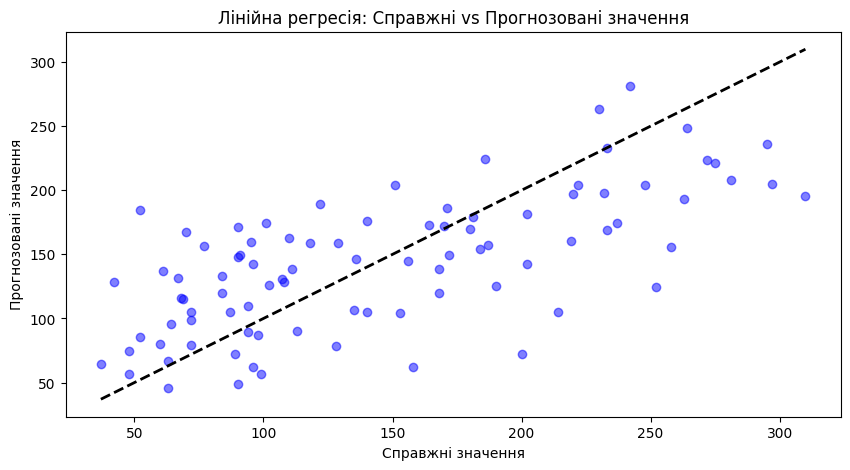

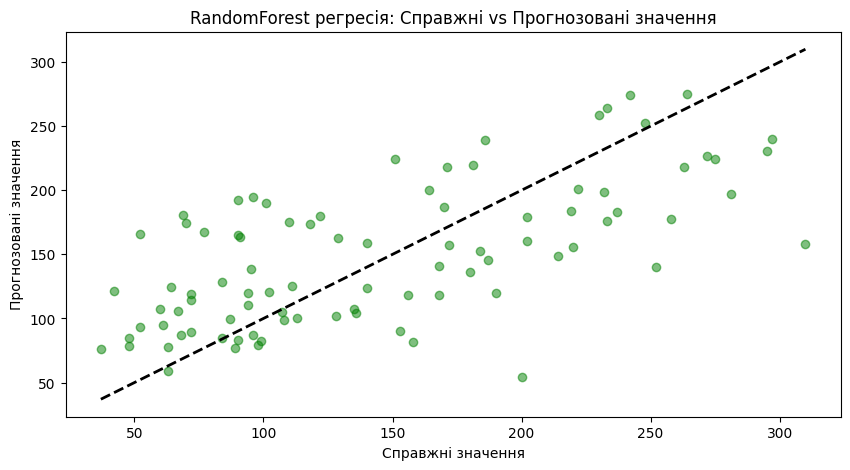

In [ ]:
#11. Побудування графіків
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test_top, y_pred_lr_top, color='blue', alpha=0.5)
plt.plot([y_test_top.min(), y_test_top.max()], [y_test_top.min(), y_test_top.max()], 'k--', lw=2)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія: Справжні vs Прогнозовані значення')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test_top, y_pred_rf_top, color='green', alpha=0.5)
plt.plot([y_test_top.min(), y_test_top.max()], [y_test_top.min(), y_test_top.max()], 'k--', lw=2)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('RandomForest регресія: Справжні vs Прогнозовані значення')
plt.show()


In [ ]:
#12. Вивести справжні і прогнозовані значення для лінійної регресії та RandomForest регресії
print("Справжні значення:", y_test_top.values[:10])
print("Прогнозовані значення (Лінійна регресія):", y_pred_lr_top[:10])
print("Прогнозовані значення (RandomForest):", y_pred_rf_top[:10])


Справжні значення: [219.  70. 202. 230. 111.  84. 242. 272.  94.  96.]
Прогнозовані значення (Лінійна регресія): [160.07934448 167.20267626 181.55788178 263.63477987 138.70776093
 119.54172877 281.50369899 223.65806038  89.15882955 142.15982531]
Прогнозовані значення (RandomForest): [184.01 174.17 179.52 258.85 125.14  84.56 274.34 227.07 119.95 194.62]
